In [1]:
import pandas as pd
import statsmodels
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import correlate
from scipy import arange

import statsmodels.tsa.stattools as stattools

In [2]:
df=pd.read_excel(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\Varouchakis 2017\data from Varouchakis 2017.xlsx', parse_dates=['date'],  index_col='date')

In [3]:
df

,gwl,rainfall,usage
date,,,
1981-01-01,62.75,850,3.00
1982-01-01,63.50,790,3.00
1983-01-01,60.50,535,3.00
1984-01-01,61.00,750,19.75
1985-01-01,62.50,795,18.00
1986-01-01,59.00,500,24.50
1987-01-01,57.75,710,21.00
1988-01-01,58.50,715,22.00
1989-01-01,57.75,570,23.00


numpy array

In [4]:
precip834  = df.filter(['gwl', 'rainfall'])

In [5]:
lags = range(1, 13)  # 2year lag

# precipitation
precip0834 = precip834.assign(**{ '{} (t-{})'.format(['rainfall'], t): precip834[['rainfall']].shift(t) for t in lags for col in precip834})
# disharge

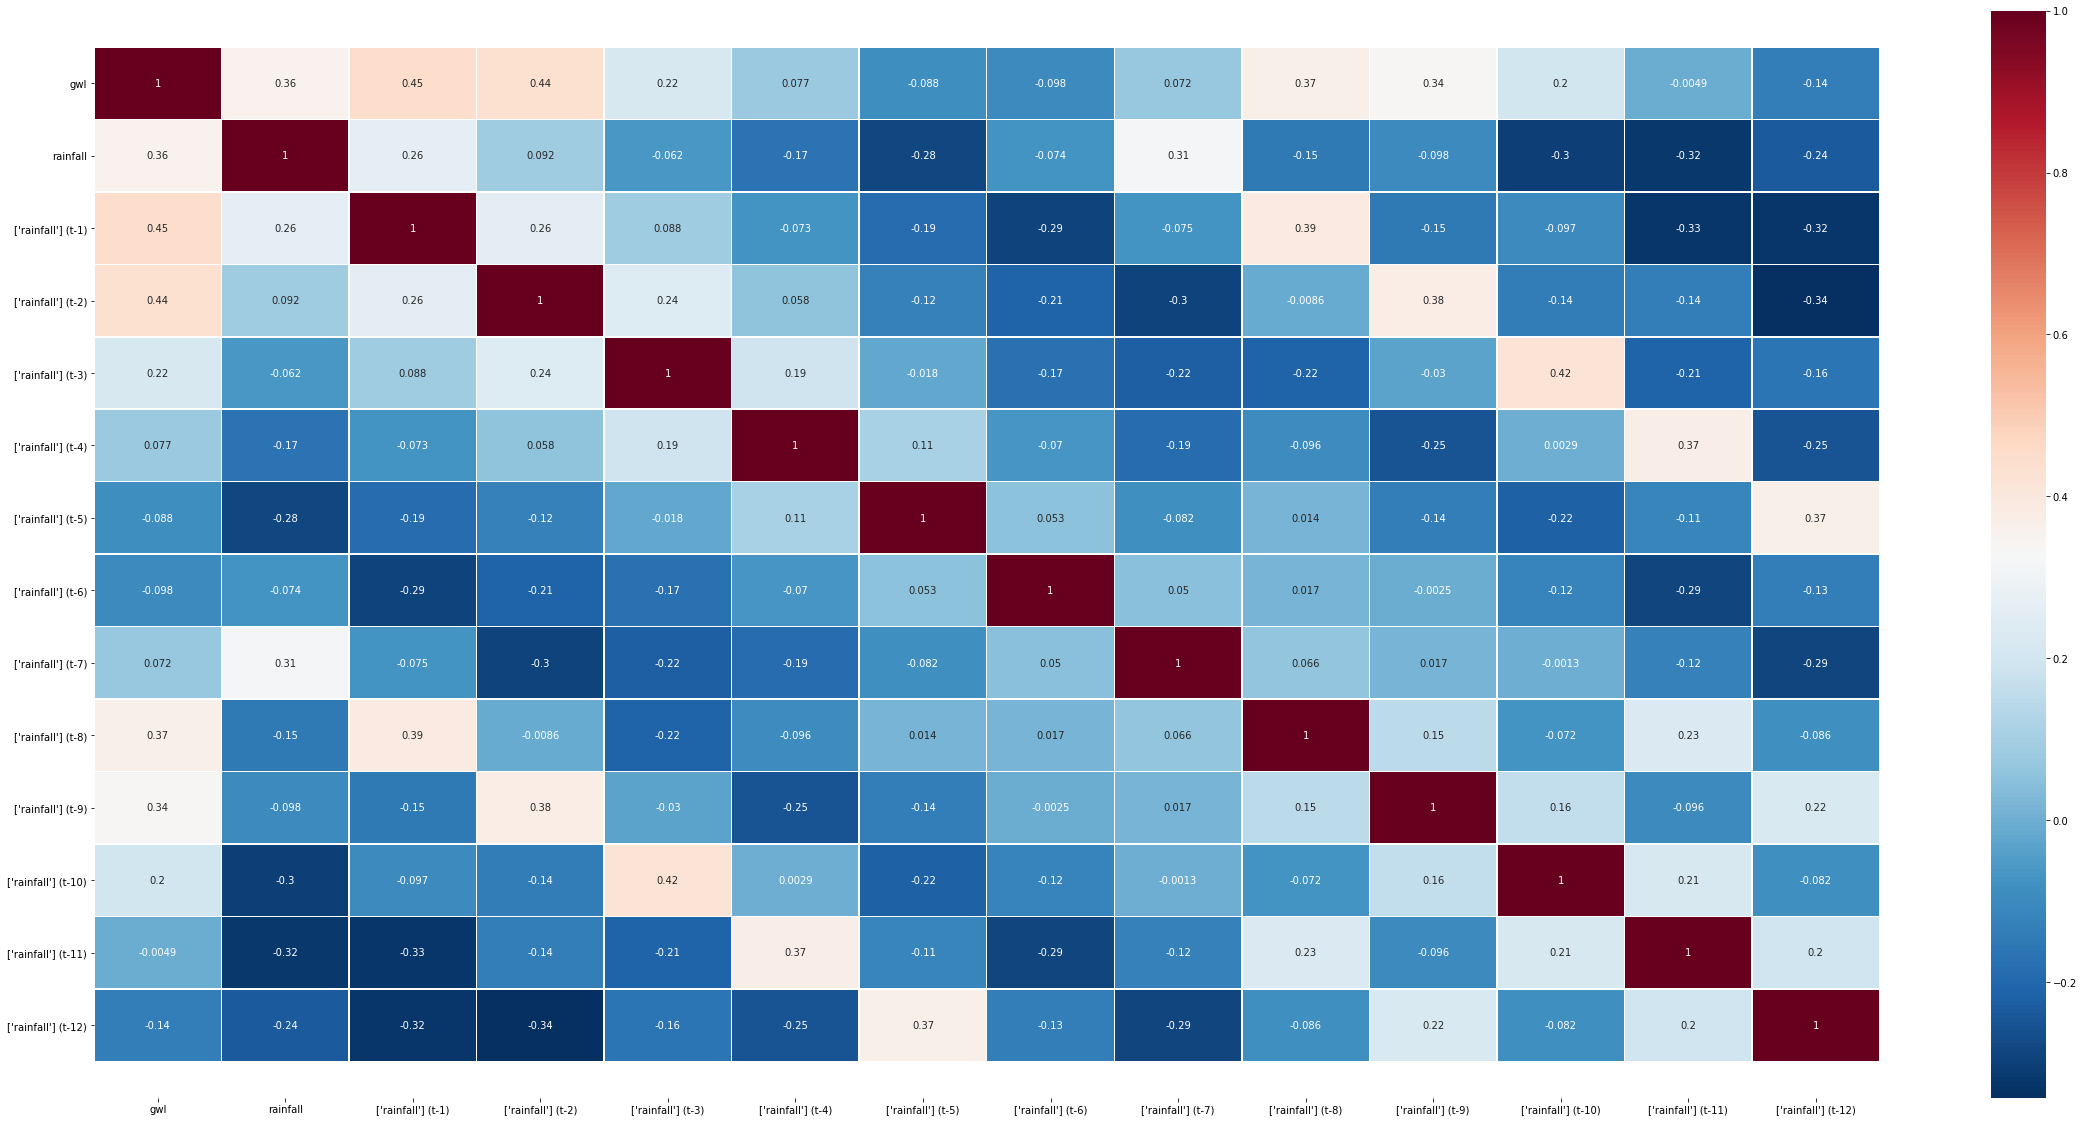

In [6]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip0834.corr(method = 'spearman')
corrm2 = precip0834.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

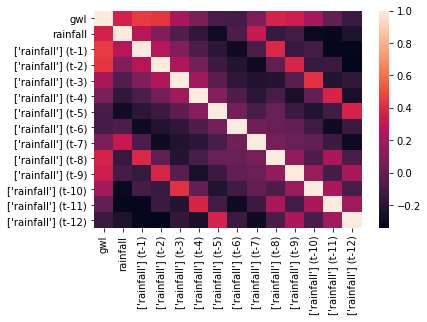

In [7]:
d=sns.heatmap(corrm2)

In [8]:
corrm2

,gwl,rainfall,['rainfall'] (t-1),['rainfall'] (t-2),['rainfall'] (t-3),['rainfall'] (t-4),['rainfall'] (t-5),['rainfall'] (t-6),['rainfall'] (t-7),['rainfall'] (t-8),['rainfall'] (t-9),['rainfall'] (t-10),['rainfall'] (t-11),['rainfall'] (t-12)
gwl,1.000000,0.358702,0.454202,0.435722,0.216248,0.077122,-0.088173,-0.098475,0.072334,0.370505,0.337772,0.198168,-0.004914,-0.136001
rainfall,0.358702,1.000000,0.261169,0.091510,-0.061915,-0.166183,-0.282968,-0.074074,0.313282,-0.148679,-0.097983,-0.303590,-0.318645,-0.235491
['rainfall'] (t-1),0.454202,0.261169,1.000000,0.259039,0.087627,-0.072849,-0.186287,-0.290856,-0.074589,0.387524,-0.150219,-0.097254,-0.325382,-0.323170
['rainfall'] (t-2),0.435722,0.091510,0.259039,1.000000,0.238857,0.058336,-0.124472,-0.213458,-0.295266,-0.008595,0.381011,-0.138655,-0.136036,-0.342714
['rainfall'] (t-3),0.216248,-0.061915,0.087627,0.238857,1.000000,0.191750,-0.018447,-0.172930,-0.223773,-0.215065,-0.030399,0.421761,-0.214797,-0.161338
['rainfall'] (t-4),0.077122,-0.166183,-0.072849,0.058336,0.191750,1.000000,0.111835,-0.069694,-0.185478,-0.095860,-0.248795,0.002948,0.373584,-0.249488
['rainfall'] (t-5),-0.088173,-0.282968,-0.186287,-0.124472,-0.018447,0.111835,1.000000,0.052634,-0.082095,0.014438,-0.137593,-0.221898,-0.114214,0.366456
['rainfall'] (t-6),-0.098475,-0.074074,-0.290856,-0.213458,-0.172930,-0.069694,0.052634,1.000000,0.049641,0.017136,-0.002480,-0.118705,-0.286888,-0.134692
['rainfall'] (t-7),0.072334,0.313282,-0.074589,-0.295266,-0.223773,-0.185478,-0.082095,0.049641,1.000000,0.066354,0.017113,-0.001325,-0.124534,-0.287234
['rainfall'] (t-8),0.370505,-0.148679,0.387524,-0.008595,-0.215065,-0.095860,0.014438,0.017136,0.066354,1.000000,0.149434,-0.072328,0.228202,-0.085539


C:\Users\Kirsty\anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<StemContainer object of 3 artists>

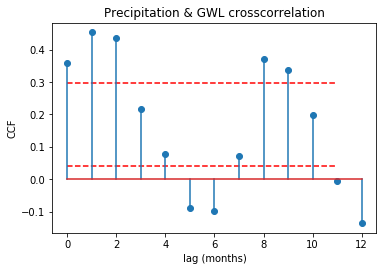

In [13]:
data=([0.358702,0.454202,0.435722,0.216248,0.077122,-0.088173,-0.098475,0.072334,
    0.370505,0.337772,0.198168,-0.004914,-0.136001
])

x=([0,1,2,3,4,5,6,7,8,9,10,11,12])

bottom=([0.04059255530632805,0.04059255530632805,0.04059255530632805,0.04059255530632805,0.04059255530632805,0.04059255530632805,
        0.04059255530632805,0.04059255530632805,0.04059255530632805,0.04059255530632805,0.04059255530632805,0.04059255530632805])

top=([0.29682467546290275,0.29682467546290275,0.29682467546290275,0.29682467546290275,0.29682467546290275
     ,0.29682467546290275,0.29682467546290275,0.29682467546290275,0.29682467546290275,0.29682467546290275,
     0.29682467546290275,0.29682467546290275])


zero=([0,0,0,0,0,0,0,0,0,0,0,0,0])

lags=12

plt.plot(bottom, color='r',linestyle='dashed')
plt.plot(top, color='r',linestyle='dashed')
#plt.plot(zero, color='k',linestyle='dashed')
plt.title('Precipitation & GWL crosscorrelation')
plt.xlabel('lag (months)')
plt.ylabel('CCF')
plt.gcf().subplots_adjust(left=0.15,bottom=0.15)
plt.stem(x,data)

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0553\xc_ A2N0553 & all usage')

In [12]:
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95


n = len(data)
m = mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
print (start)

end = m + h
print (end)


0.04059255530632805
0.29682467546290275


C:\Users\Kirsty\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  import sys


In [ ]:
import statsmodels.stats.api as sms

sms.DescrStatsW(data).tconfint_mean()

## END

In [ ]:
y= df.iloc[0:12,0:2].values 
print(y.shape)
#x= df.iloc[0:12, 2:3].values  
#print(x.shape) 


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as stattools


lags= 12
sl = 2 / np.sqrt(lags)

plt.plot(x, list(np.ones(lags) * sl), color='r')
plt.plot(x, list(np.ones(lags) * -sl), color='r')

plt.plot(stattools.ccf(x, y))

In [ ]:
s=statsmodels.tsa.stattools.ccf(x, y, unbiased=False)

import statsmodels.tsa.stattools as stattools
lags=12
sl= 2 / np.sqrt(lags)
plt.plot( list(np.ones(lags) * sl), color='r')
plt.plot(list(np.ones(lags) * -sl), color='r')
plt.plot(s)


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.stattools import acf

In [ ]:
plt.plot(ccf(y, y, unbiased=False))

In [ ]:
cvf = ccf(x, y, adjusted=adjusted, demean=True)
return cvf / (np.std(x) * np.std(y))

In [ ]:
from scipy.signal import correlate
from scipy import arange

corr2=correlate(y, x)

In [ ]:
import statsmodels.tsa.stattools as stattools
lags=12

sl= 2 / np.sqrt(lags)
plt.plot( list(np.ones(lags) * sl), color='r')
plt.plot(list(np.ones(lags) * -sl), color='r')
plt.plot(corr2)




plt.title('Evapotranspiration and Groundwater level- cross correlation')

plt.xlabel('Lag (months)')

plt.ylabel('CCF')

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\A2N0615\CCP_A2N0615_ptrcip&GWL')

In [ ]:
from scipy import signal
f=signal.convolve(x,y)
f



In [ ]:
import statsmodels.tsa.stattools as stattools
lags=12
sl= 2 / np.sqrt(lags)
plt.plot( list(np.ones(lags) * sl), color='r')
plt.plot(list(np.ones(lags) * -sl), color='r')
plt.plot(f)




plt.title('Evapotranspiration and Groundwater level- cross correlation')

plt.xlabel('Lag (months)')

plt.ylabel('CCF')

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\A2N0615\CCP_A2N0615_ptrcip&GWL')

In [ ]:
from scipy import signal
from scipy import misc

corr = signal.correlate2d(x, y)

y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match

In [ ]:
corr

In [ ]:
import statsmodels.tsa.stattools as stattools
lags= 12
sl= 2 / np.sqrt(lags)
plt.plot( list(np.ones(lags) * sl), color='r')
plt.plot(list(np.ones(lags) * -sl), color='r')
plt.plot(corr)




plt.title('Evapotranspiration and Groundwater level- cross correlation')

plt.xlabel('Lag (months)')

plt.ylabel('CCF')

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\A2N0615\CCP_A2N0615_ptrcip&GWL')

In [ ]:
y, x

In [ ]:
statsmodels.tsa.stattools.ccf(x, y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as stattools


plt.plot(stattools.ccf(x, y)[:12])

In [ ]:
import statsmodels.tsa.stattools as stattools
lags= 12
sl= 2 / np.sqrt(lags)
plt.plot( list(np.ones(lags) * sl), color='r')
plt.plot(list(np.ones(lags) * -sl), color='r')
plt.plot(stattools.ccf(x, y))




plt.title('Evapotranspiration and Groundwater level- cross correlation')

plt.xlabel('Lag (months)')

plt.ylabel('CCF')

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\A2N0615\CCP_A2N0615_ptrcip&GWL')

In [ ]:
plt.plot(stattools.ccf(x, y))

In [ ]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=ccp, ymin=0, ymax=1, color='firebrick', 
          alpha=0.7, linewidth=2)
ax.scatter(x=array,y=ccp, s=75, color='firebrick', alpha=0.7)